# Figuras en Python - MATPLOTLIB

## Introducción

Matplotlib es una excelente biblioteca de gráficos 2D y 3D para generar figuras científicas. Algunas de las muchas ventajas de esta biblioteca incluyen:

* Fácil de empezar, y cuenta con un gran soporte para etiquetas y textos con formato $\LaTeX$

* Gran control de cada elemento de una figura, incluidos el tamaño de la figura y el DPI.

* Salida de alta calidad en muchos formatos, incluidos PNG, PDF, SVG, EPS y PGF.

* GUI para explorar de forma interactiva los valores en una figura.

Una de las características clave de matplotlib que me gustaría enfatizar, y que creo que hace que matplotlib sea muy adecuado para generar figuras para publicaciones científicas, es que todos los aspectos de la figura pueden controlarse mediante programación. Esto es importante para la reproducir resultados y es conveniente cuando se necesita regenerar la figura con datos actualizados o cambiar su apariencia.

Se puede encontrar una gran cantidad de información al respecto en la página web de [Matplotlib](http://matplotlib.org).

Para comenzar a utilizar Matplotlib en un programa de Python, incluya los símbolos del módulo `pyplot` (de manera sencilla):

In [1]:
import matplotlib.pyplot as plt
# importamos ademas la librería de calculo numérico numpy
import numpy as np

## API similar a MATLAB

La forma más fácil de comenzar con el trazado de matplotlib es usar la API similar a MATLAB proporcionada por matplotlib.

Está diseñado para ser compatible con las funciones de trazado de MATLAB, por lo que es fácil comenzar si está familiarizado con MATLAB.

Para usar esta API de matplotlib, necesitamos incluir los símbolos en el módulo `pylab`:

In [2]:
from pylab import *

### Ejemplo

Haremos una figura simple con la API de trazado de MATLAB. Primero generamos datos en $x$ e $y$:

In [3]:
x = np.linspace(0, 5, 10)
y = x ** 2

y luego los hacemos la gráfica:

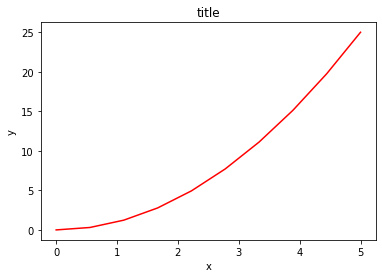

In [4]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

La mayoría de las funciones relacionadas con el trazado en MATLAB están cubiertas por el módulo `pylab`. Por ejemplo, subplot y selección de color / símbolo:

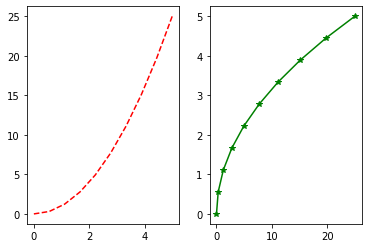

In [5]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

Lo bueno de la API de estilo MATLAB de Pylab es que es fácil comenzar si se está familiarizado con MATLAB, y tiene un mínimo de sobrecarga de codificación para diagramas simples.

Sin embargo, recomendaría no usar la API compatible con MATLAB para nada más que las figuras más simples.

En su lugar, recomiendo aprender y usar la API de trazado orientado a objetos de matplotlib. Es notablemente poderoso. Para figuras avanzadas con sub-figuras, inserciones y otros componentes, es muy agradable trabajar con ellos.

## La API orientada a objetos matplotlib

La idea principal de la programación orientada a objetos es tener objetos en los que se puedan aplicar funciones y acciones, y ningún estado de objeto o programa debe ser global (como la API similar a MATLAB). La ventaja real de este enfoque se hace evidente cuando se crea más de una figura, o cuando una figura contiene más de un argumento secundario.

Para utilizar la API orientada a objetos, comenzamos como en el ejemplo anterior, pero en lugar de crear una nueva instancia de figura global, almacenamos una referencia a la instancia de figura recién creada en la variable `fig`, y a partir de ella creamos una instancia de ejes o `axes` usando el método `add_axes` en la instancia de la clase `Figure`,  `fig`:

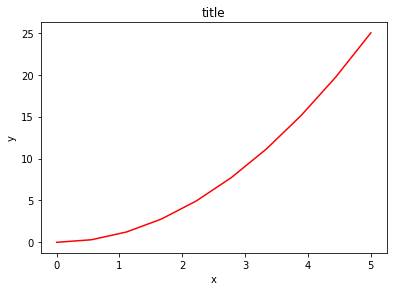

In [6]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # izquierda, inferior, ancho, alto (rango 0 a 1)

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Aunque está involucrado un poco más de código, la ventaja es que ahora tenemos el control total de dónde se colocan los ejes de trazado, y podemos agregar fácilmente más de un eje a la figura:

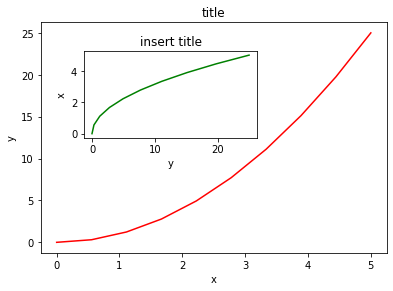

In [7]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # eje principal
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # eje interior

# figura principal
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# figura interior
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

Si no nos importa ser explícitos acerca de dónde se ubican nuestros ejes de trazado en la figura, entonces podemos usar uno de los muchos administradores de diseño de ejes en matplotlib. Mi favorito es `subplots`, que se puede usar así:

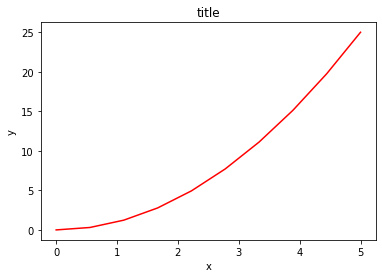

In [8]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

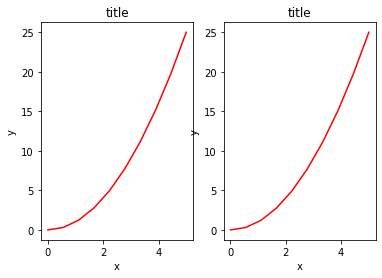

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

Eso fue fácil, pero no resulta del todo bonito ya que las etiquetas se superponen a los ejes.

Podemos lidiar con eso usando el método `fig.tight_layout`, que ajusta automáticamente las posiciones de los ejes en la ventana de la figura para que no haya contenido superpuesto:

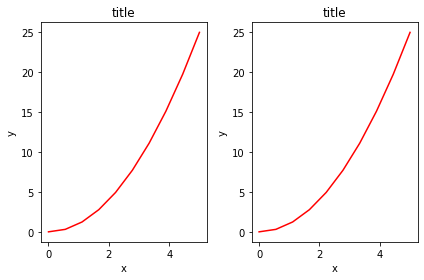

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Tamaño de la figura, relación de aspecto y DPI

Matplotlib permite especificar la relación de aspecto, el DPI y el tamaño de la figura cuando se crea el objeto de la clase `Figure`, utilizando los argumentos claves `figsize` y `dpi`. `figsize` es una tupla del ancho y alto de la figura en pulgadas, y `dpi` es la cantidad de pixels por pulgada. Para crear una figura de 800x400 pixels, 100 puntos por pulgada (DPI), podemos hacer:

In [11]:
fig = plt.figure(figsize=(8,4), dpi=100);

<Figure size 800x400 with 0 Axes>

Los mismos argumentos también se pueden pasar a los gestores de diseño de figuras , como la función `subplots`:

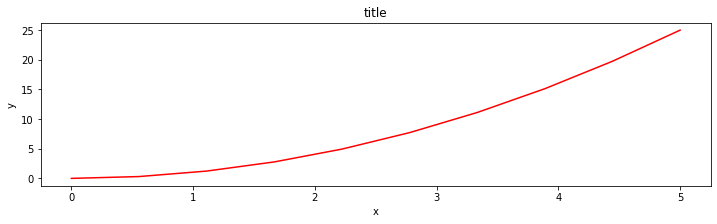

In [12]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Guardando figuras

Para guardar una figura en un archivo, podemos utilizar el método `savefig` en la clase `Figure`:

In [13]:
fig.savefig("filename.png")

Aquí también podemos especificar opcionalmente el DPI y elegir entre diferentes formatos de salida:

In [14]:
fig.savefig("filename.png", dpi=200)

### Formatos disponibles: ¿cuáles deben usarse para obtener la mejor calidad?

Matplotlib puede generar resultados de alta calidad en varios formatos, incluidos PNG, JPG, EPS, SVG, PGF y PDF. Para artículos científicos, recomiendo usar PDF siempre que sea posible. (Los documentos LaTeX compilados con `pdflatex` pueden incluir archivos PDF usando el comando `includegraphics`). En algunos casos, PGF también puede ser una buena alternativa.

### Leyendas, etiquetas y títulos

Ahora que hemos cubierto los conceptos básicos de cómo crear un lienzo de figura y agregar instancias de ejes al lienzo, veamos cómo decorar una figura con títulos, etiquetas de ejes y leyendas.

#### Títulos de las figuras

Se puede agregar un título a cada instancia de eje en una figura. Para establecer el título, use el método `set_title` en la instancia de los ejes:

In [15]:
ax.set_title("title");

#### Nombres de eje

De manera similar, con los métodos `set_xlabel` y `set_ylabel`, podemos establecer los nombres o etiquetas de los ejes X e Y:

In [16]:
ax.set_xlabel("x")
ax.set_ylabel("y");

#### Leyendas

Las leyendas para las curvas en una figura se pueden agregar de dos maneras. Un método es usar el método `legend` del objeto de eje y pasar una lista/tupla de textos de leyenda para las curvas definidas previamente:

In [17]:
ax.legend(["curva1", "curva2", "curva3"]);

El método descrito anteriormente sigue la API de MATLAB. Es algo propenso a errores y no es flexible si se agregan o eliminan curvas de la figura (lo que resulta en una curva mal etiquetada).

Un método mejor es usar como argumento la palabra clave `label="label text"` cuando se agregan sub-figuras u otros objetos a la figura, y luego usar el método `legend` sin argumentos para agregar la leyenda a la figura:

In [18]:
ax.plot(x, x**2, label="curva1")
ax.plot(x, x**3, label="curva2")
ax.legend();

La ventaja de este método es que si se agregan o eliminan curvas de la figura, la leyenda se actualiza automáticamente en consecuencia.

La función `legend` toma un argumento de palabra clave opcional `loc` que se puede usar para especificar dónde se dibujará la leyenda en la figura. Los valores permitidos de `loc` son códigos numéricos para los distintos lugares donde se puede dibujar la leyenda. Consulte [la documentación de Matplotlib](http://matplotlib.org/users/legend_guide.html#legend-location) para obtener más información.

Algunos de los valores más comunes de `loc` son:

In [19]:
ax.legend(loc=0) # matplotlib decide la ubicación óptima
ax.legend(loc=1) # arriba a la derecha
ax.legend(loc=2) # arriba a la izquierda
ax.legend(loc=3) # abajo a la izquierda
ax.legend(loc=4); # abajo a la derecha
# .. many more options are available

En el siguiente ejemplo se muestra cómo usar el título de la figura, las etiquetas de los ejes y las leyendas descritas anteriormente:

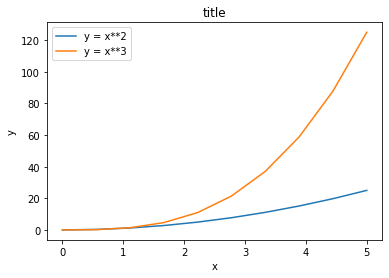

In [20]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # arriba a la izquierda 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Formato de texto: LaTeX, tamaño de fuente, familia de fuentes

La figura anterior es funcional, pero (aún) no cumple los criterios de una figura utilizada en una publicación. Primero y ante todo, necesitamos tener texto con formato LaTeX, y segundo, debemos poder ajustar el tamaño de la fuente para que aparezca en una publicación.

Matplotlib tiene un gran soporte para LaTeX. Todo lo que tenemos que hacer es usar signos de dólar para encapsular LaTeX en cualquier texto (leyenda, título, etiqueta, etc.). Por ejemplo, `"$y=x^3$"`.

Pero aquí podemos encontrar un problema ligeramente sutil con el código LaTeX y las cadenas de texto de Python. En LaTeX, frecuentemente usamos la barra invertida en los comandos, por ejemplo `\alpha` para producir el símbolo $\alpha$. Pero la barra invertida ya tiene un significado en las cadenas de Python (el carácter del código de escape). Para evitar que Python estropee nuestro código de látex, necesitamos usar cadenas de texto "sin procesar". Las cadenas de texto sin formato se añaden con una '`r`', como `r"\alpha"` o `r'\alpha'` en lugar de `"\alpha"` o `'\alpha'`:

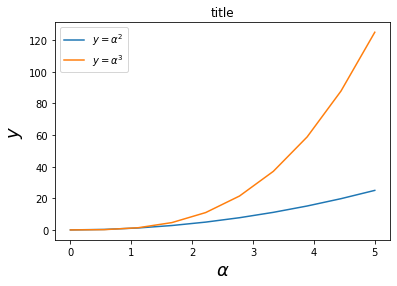

In [21]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

También podemos cambiar el tamaño de fuente global y la familia de fuentes, que se aplica a todos los elementos de texto en una figura (etiquetas y títulos de ejes, leyendas, etc.):

In [22]:
# Actualiza los parámetros de configuración de Matplotlib 
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

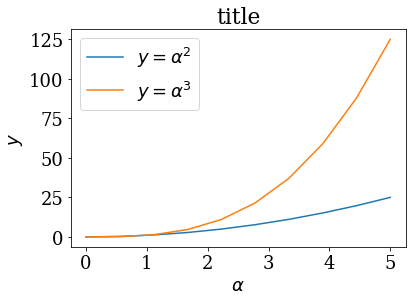

In [23]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

Una buena elección de fuentes globales son las fuentes STIX:

In [24]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

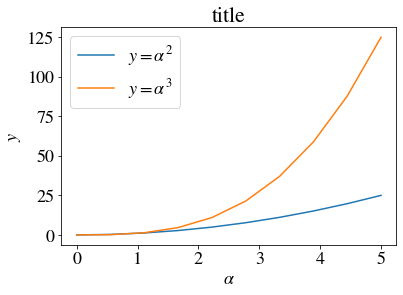

In [25]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### Configuración de colores, tipos de línea y marcadores

#### Colores

Con matplotlib se puede definir los colores de las lineas y de otros elementos gráficos de varias maneras. Primero podemos usar una sintaxis parecida a la de MATLAB donde `'b'` significa blue (azul), `'g'` significa green (verde), etc. El API de MATLAB para seleccionar estilos de lineas también es soportado: donde  `'b.-'`  significa azul con linea estilo linea punto.

In [26]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

También podemos definir los colores por sus nombres o códigos hexadecimales RGB y, opcionalmente, proporcionar un valor alfa utilizando los argumentos de las palabras clave `color` y `alpha`:

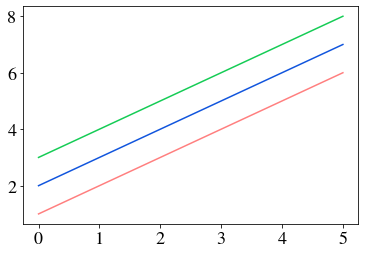

In [27]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # transparencia media
ax.plot(x, x+2, color="#1155dd")        # código hexadecimal RGB para un color azulado
ax.plot(x, x+3, color="#15cc55");        # # código hexadecimal RGB para un color verdoso

#### Estilos de líneas y marcadores

Para cambiar el ancho de línea, podemos usar el argumento de la palabra clave `linewidth` o `lw`. El estilo de línea se puede seleccionar usando los argumentos de la palabra clave `linestyle` o `ls`:

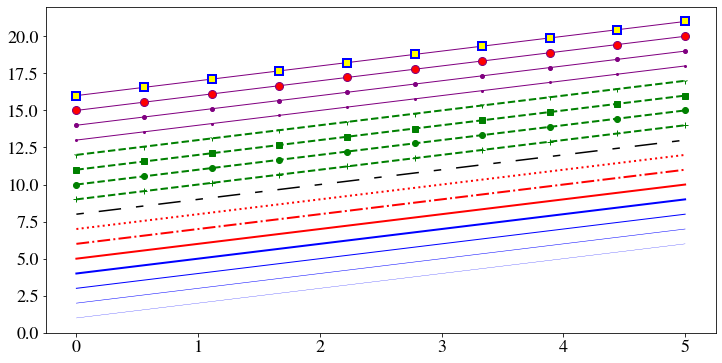

In [28]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", lw=0.25) # lw=linewidth
ax.plot(x, x+2, color="blue", lw=0.50)
ax.plot(x, x+3, color="blue", lw=1.00)
ax.plot(x, x+4, color="blue", lw=2.00)

# posibles opciones de tipos de linea ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, ls='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# trazo a tramos personalizado
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # formato: largo de linea, largo del espacio, ...

# símbolos de marcadores posibles: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# tamaño y color de los marcadores
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control sobre la apariencia del eje

La apariencia de los ejes es un aspecto importante de una figura que a menudo necesitamos modificar para hacer una publicación con calidad gráfica. Necesitamos poder controlar dónde se colocan las marcas y las etiquetas, modificar el tamaño de la fuente y posiblemente las etiquetas utilizadas en los ejes. En esta sección veremos cómo controlar esas propiedades en una figura de matplotlib.

#### Rango

Lo primero que podríamos querer configurar es el rango de los ejes. Podemos hacerlo utilizando los métodos `set_ylim` y `set_xlim` en el objeto de eje, o `axis('tight')` para obtener rangos de ejes "ajustados" de manera automática:

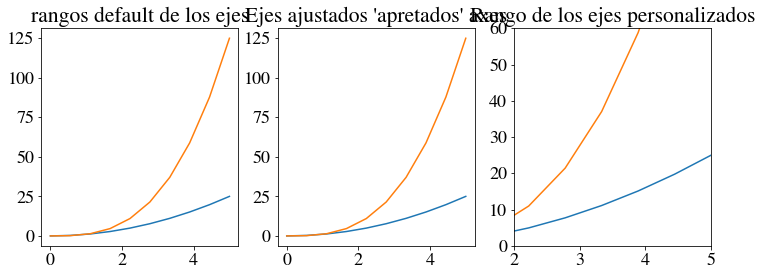

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("rangos default de los ejes")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("Ejes ajustados 'apretados' axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("Rango de los ejes personalizados");

#### Escala logarítmica

También es posible establecer una escala logarítmica para uno o ambos ejes. De hecho, esta funcionalidad es solo una aplicación de un sistema de transformación más general en Matplotlib. Cada una de las escalas de los ejes se establece por separado utilizando los métodos `set _xscale` y `set_yscale` que aceptan un parámetro (con el valor "log" en este caso):

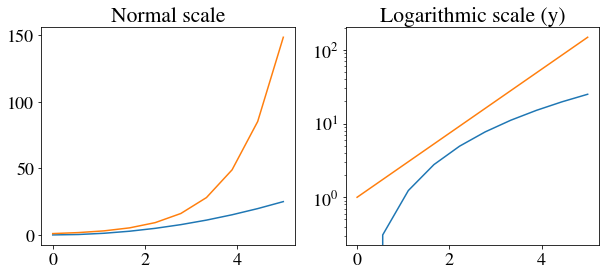

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Ubicación de las etiquetas y etiquetas personalizadas

Podemos determinar explícitamente dónde queremos que los tics del eje con `set_xticks` y `set_yticks`, que toman una lista de valores para los lugares donde se colocarán los tics en el eje. También podemos usar los métodos `set_xticklabels` y `set_yticklabels` para proporcionar una lista de etiquetas de texto personalizadas para cada ubicación de marca:

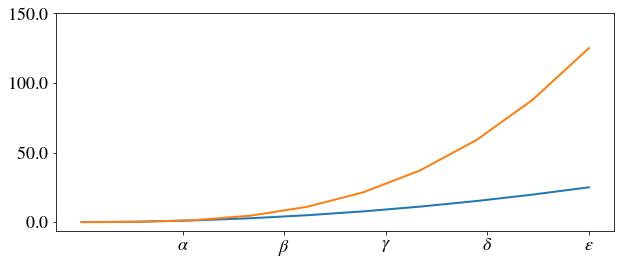

In [31]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # usa latex para formatear los tics

Hay una serie de métodos más avanzados para controlar la colocación de marcas mayores y menores en las cifras de matplotlib, como la ubicación automática de acuerdo con diferentes políticas. Consulte la [documentación de matplotlib](http://matplotlib.org/api/ticker_api.html) para obtener más información.

#### Notación científica

Con grandes números en los ejes, a menudo es mejor usar la notación científica:

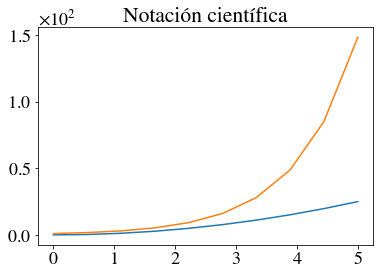

In [32]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Notación científica")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)

### Número de eje y espaciado de la etiqueta del eje

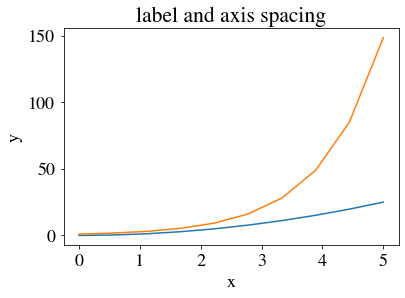

In [33]:
# distancia entre x e y y el numero del eje
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# separación entre la etiqueta del eje y los números del eje 
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [34]:
# Recuperamos los valores por defecto
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Ajustes de posición del eje

Desafortunadamente, al guardar figuras, las etiquetas a veces se recortan, y puede ser necesario ajustar un poco las posiciones de los ejes. Esto se puede hacer usando `subplots_adjust`:

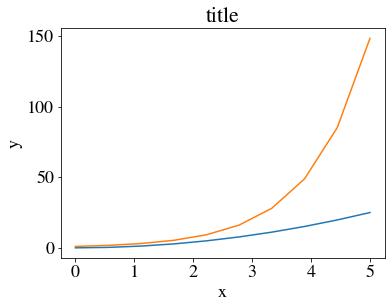

In [35]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9)

### Grillas

Con el método `grid` en el objeto de eje, podemos activar y desactivar las líneas de la cuadrícula. También podemos personalizar el aspecto de las líneas de la cuadrícula utilizando los mismos argumentos de palabras clave que la función `plot`:

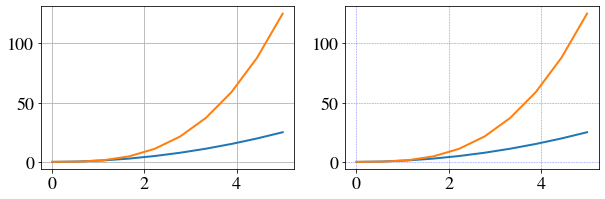

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# apariencia default de la grilla
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# apariencia de la grilla personalizada
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Lineas de eje

También podemos cambiar las propiedades de las lineas de los ejes:

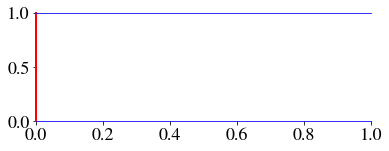

In [37]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# sacamos las lineas del lado de la derecha
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # ponemos solos los tics de la izquierda

### Ejes gemelos

A veces es útil tener ejes x o y duales en una figura; por ejemplo, al trazar curvas con diferentes unidades juntas. Matplotlib admite esto con las funciones `twinx` y `twiny`:

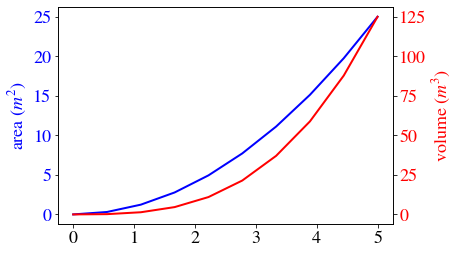

In [38]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Ejes donde x e y son cero

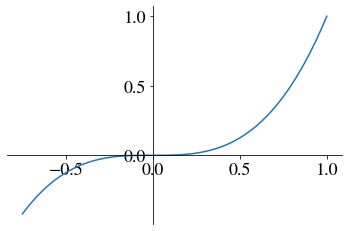

In [39]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Otros estilos de trama 2D

Además del método regular 'plot', hay una serie de otras funciones para generar diferentes tipos de gráficos. Consulte la [galería de gráficos de matplotlib](http://matplotlib.org/gallery.html) para obtener una lista completa de los tipos de gráficos disponibles. Algunos de los más útiles se muestran a continuación:

In [40]:
n = np.array([0,1,2,3,4,5])

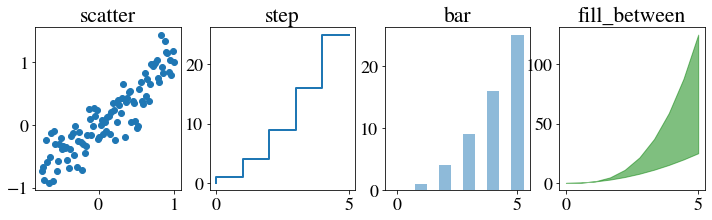

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

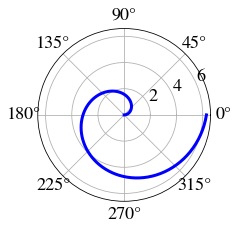

In [42]:
# gráfico polar usando add_axes y una proyección polar
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

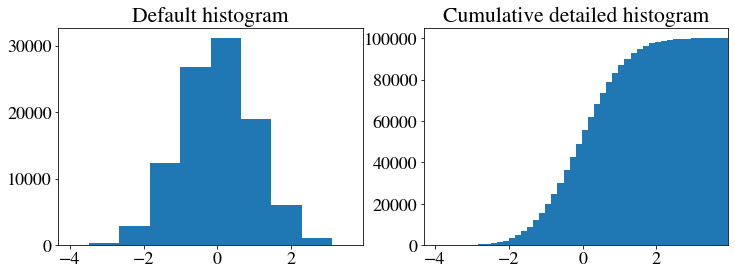

In [43]:
# Un histograma
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Anotación de texto

La anotación de texto en las figuras de matplotlib se puede hacer usando la función `text`. Admite el formateo LaTeX al igual que los textos y títulos de etiquetas de ejes:

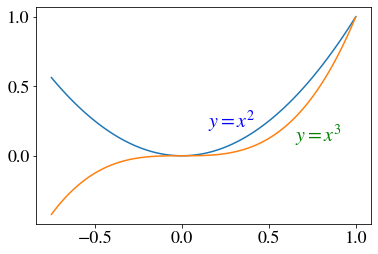

In [44]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figuras con múltiples sub-figuras e inserciones

Los ejes se pueden agregar a una figura de matplotlib manualmente usando `fig.add_axes` o usando un administrador de diseño de sub-figuras como `subplots`, `subplot2grid` o `gridspec`:

#### subplots

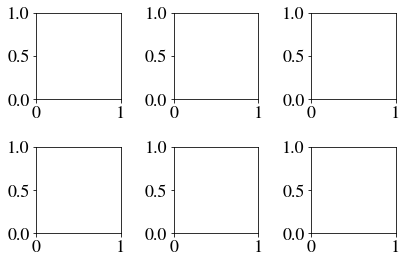

In [45]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

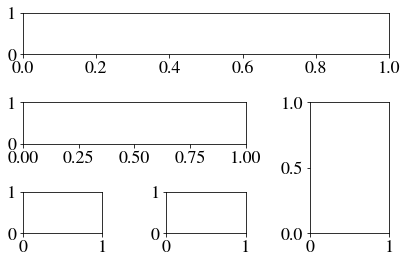

In [46]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [47]:
import matplotlib.gridspec as gridspec

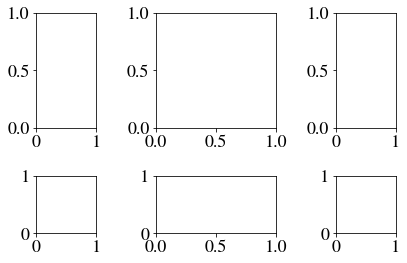

In [48]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

La adición manual de ejes con `add_axes` es útil para agregar inserciones a las figuras:

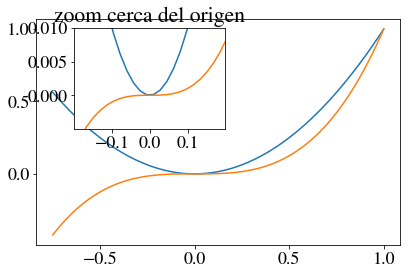

In [49]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# interno
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, ancho, alto

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom cerca del origen')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Figuras de colores y contornos

Los mapas de colores y las figuras de contorno son útiles para trazar funciones de dos variables. En la mayoría de estas funciones, utilizaremos un mapa de colores para codificar una dimensión de los datos. Hay una serie de mapas de color predefinidos. Es relativamente sencillo definir mapas de colores personalizados. Para obtener una lista de mapas de colores predefinidos, consulte [aquí](http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps)

In [50]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [51]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

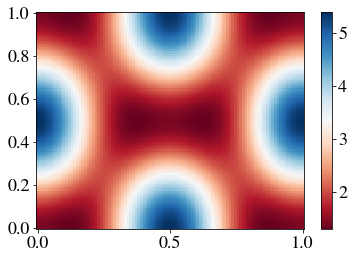

In [52]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), shading='auto')
cb = fig.colorbar(p, ax=ax)

#### imshow

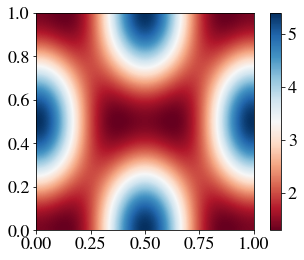

In [53]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

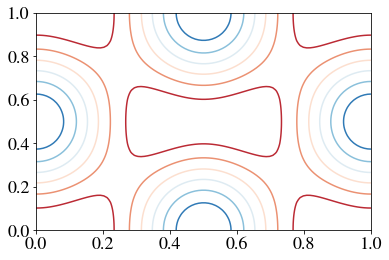

In [54]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

### Otras lecturas

* [The project web page for matplotlib](http://www.matplotlib.org).
* [The source code for matplotlib](https://github.com/matplotlib/matplotlib).
* [A large gallery with various types of plots matplotlib can create](http://matplotlib.org/gallery.html). Recomendada!
* [A good matplotlib tutorial](http://www.loria.fr/~rougier/teaching/matplotlib ).
* [Another good matplotlib reference](http://scipy-lectures.github.io/matplotlib/matplotlib.html).